In [60]:
from google.colab import files
import io
import pandas as pd

# Use files.upload() to upload the file from your local machine
uploaded = files.upload()

# Assuming you know the filename, or if there's only one file uploaded, use it to read into a DataFrame
file_name = next(iter(uploaded))  # Gets the name of the uploaded file
happiness_data = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display the first few rows of the dataset
happiness_data.head()


Saving World_Happiness_import_data.csv to World_Happiness_import_data (3).csv


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


            Score  GDP per capita  Healthy life expectancy  \
count  156.000000      156.000000               156.000000   
mean     5.407096        0.905147                 0.725244   
std      1.113120        0.398389                 0.242124   
min      2.853000        0.000000                 0.000000   
25%      4.544500        0.602750                 0.547750   
50%      5.379500        0.960000                 0.789000   
75%      6.184500        1.232500                 0.881750   
max      7.769000        1.684000                 1.141000   

       Freedom to make life choices  Generosity  
count                    156.000000  156.000000  
mean                       0.392571    0.184846  
std                        0.143289    0.095254  
min                        0.000000    0.000000  
25%                        0.308000    0.108750  
50%                        0.417000    0.177500  
75%                        0.507250    0.248250  
max                        0.631000    0.

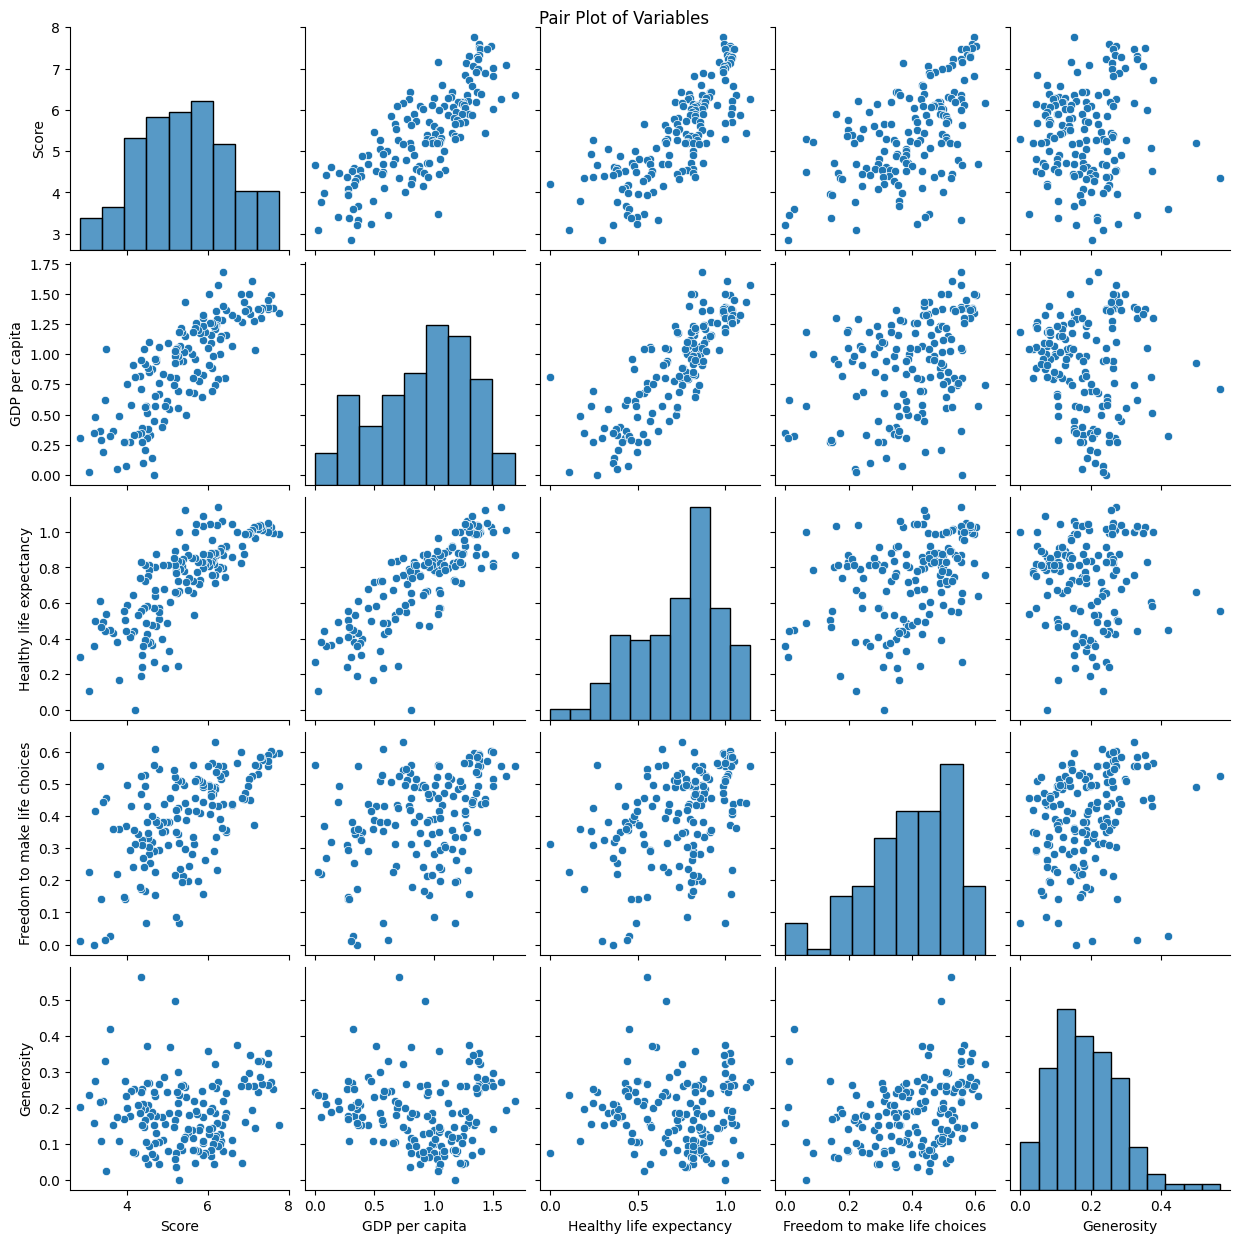

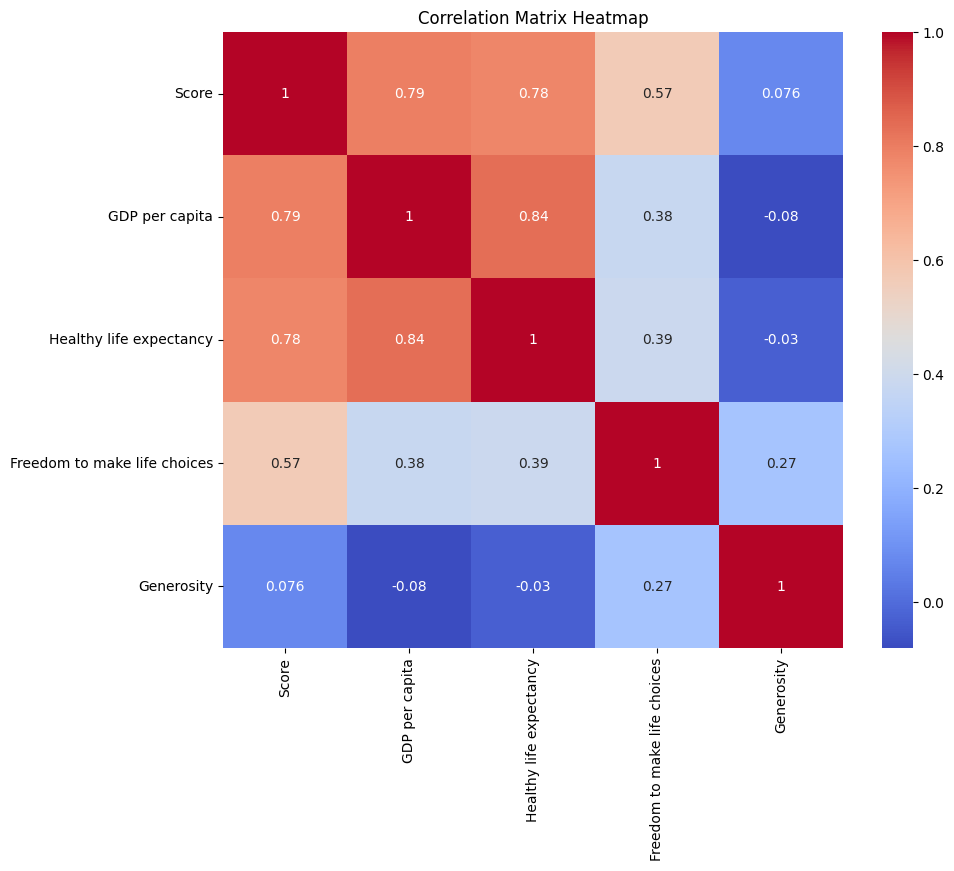

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
# Preprocessing: Set 'Country or region' as index and select relevant columns
happiness_data.set_index('Country or region', inplace=True)
selected_columns = ['Score', 'GDP per capita', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity']
happiness_data = happiness_data[selected_columns]

# EDA
# Descriptive statistics
print(happiness_data.describe())

# Pair plot to visualize relationships between variables
sns.pairplot(happiness_data)
plt.suptitle('Pair Plot of Variables', verticalalignment='bottom')
plt.show()

# Correlation matrix heatmap
corr_matrix = happiness_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [70]:
# Simple Linear Regression (SLR) using OLS
X_slr = sm.add_constant(happiness_data['GDP per capita'])  # Adding a constant for OLS
y = happiness_data['Score']
slr_model = sm.OLS(y, X_slr).fit()

# Multiple Linear Regression (MLR) using OLS
X_mlr = sm.add_constant(happiness_data.drop('Score', axis=1))  # Dropping 'Score' and adding a constant
mlr_model_ols = sm.OLS(y, X_mlr).fit()

print("SLR using OLS Summary:")
print(slr_model.summary())

print("\nMLR using OLS Summary:")
print(mlr_model_ols.summary())

SLR using OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.32e-35
Time:                        06:51:38   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.

In [71]:
#Diagnostic Tests
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Jarque-Bera Test for normality of residuals
jb_test = stats.jarque_bera(mlr_model_ols.resid)

# Durbin-Watson Test for autocorrelation
dw_test = sm.stats.durbin_watson(mlr_model_ols.resid)

# Breusch-Pagan Test and White Test for heteroscedasticity
bp_test = sms.het_breuschpagan(mlr_model_ols.resid, mlr_model_ols.model.exog)
white_test = sms.het_white(mlr_model_ols.resid, mlr_model_ols.model.exog)


# Calculating VIF for Multicolinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_mlr.columns
vif_data["VIF"] = [variance_inflation_factor(X_mlr.values, i) for i in range(X_mlr.shape[1])]

# Printing the results
print(f"Jarque-Bera Test: {jb_test}")
print(f"Durbin-Watson Test: {dw_test}")
print(f"Breusch-Pagan Test: {bp_test}")
print(f"White's Test: {white_test}")
print(vif_data)

Jarque-Bera Test: SignificanceResult(statistic=12.153180669690425, pvalue=0.0022959918852147126)
Durbin-Watson Test: 1.485342713887015
Breusch-Pagan Test: (7.628927555498747, 0.10615668629958704, 1.9410253661663193, 0.1064969420180112)
White's Test: (12.736282961029426, 0.5473860624923446, 0.8953597376830442, 0.5652912292633937)
                        feature        VIF
0                         const  15.632617
1                GDP per capita   3.414305
2       Healthy life expectancy   3.383868
3  Freedom to make life choices   1.328438
4                    Generosity   1.125916


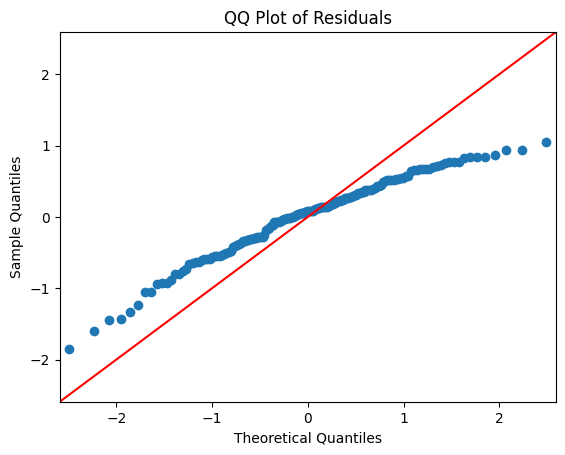

In [64]:
# Generate QQ plot for the residuals
sm.qqplot(mlr_model_ols.resid, line='45')
plt.title('QQ Plot of Residuals')
plt.show()


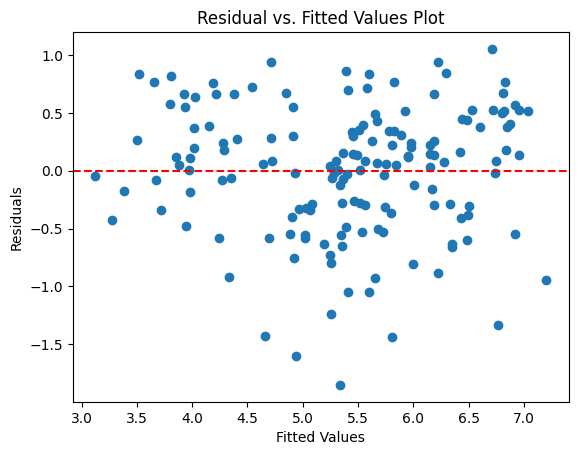

In [65]:
#residual plot
# Calculate residuals and fitted values
residuals = mlr_model_ols.resid
fitted = mlr_model_ols.fittedvalues

# Creating the residual plot
plt.scatter(fitted, residuals)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Values Plot')
plt.show()


In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

X = happiness_data[['GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']]
y = happiness_data['Score']

# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Grid search for the best model
alpha_space = np.logspace(-4, 0, 50)
ridge = Ridge()
param_grid = {'alpha': alpha_space}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_scaled, y)

# Best model
best_ridge = ridge_cv.best_estimator_
print("Best alpha :", ridge_cv.best_params_)
print("Best score :", ridge_cv.best_score_)

# Evaluate the model
ridge_y_pred = best_ridge.predict(X_scaled)
ridge_mse = mean_squared_error(y, ridge_y_pred)
print("Ridge Regression Mean Squared Error:", ridge_mse)


Best alpha : {'alpha': 1.0}
Best score : -5.92355294464986
Ridge Regression Mean Squared Error: 0.31454760082716743


In [67]:

'''# Weighted Least Squares (WLS)
weights_wls = 1 / happiness_data.drop('Score', axis=1).var(axis=1)
mlr_model_wls = sm.WLS(y, X_mlr, weights=weights_wls).fit()

# Generalized Least Squares (GLS)
residuals_ols = mlr_model_ols.resid
sigma_gls = np.eye(len(y)) * residuals_ols.var()
gls_model = sm.GLS(y, X_mlr, sigma=sigma_gls).fit()

# Printing summaries
print("SLR using OLS Summary:")
print(slr_model.summary())

print("\nMLR using OLS Summary:")
print(mlr_model_ols.summary())

print("\nMLR using WLS Summary:")
print(mlr_model_wls.summary())

print("\nMLR using GLS Summary:")
print(gls_model.summary())'''



'# Weighted Least Squares (WLS)\nweights_wls = 1 / happiness_data.drop(\'Score\', axis=1).var(axis=1)\nmlr_model_wls = sm.WLS(y, X_mlr, weights=weights_wls).fit()\n\n# Generalized Least Squares (GLS)\nresiduals_ols = mlr_model_ols.resid\nsigma_gls = np.eye(len(y)) * residuals_ols.var()\ngls_model = sm.GLS(y, X_mlr, sigma=sigma_gls).fit()\n\n# Printing summaries\nprint("SLR using OLS Summary:")\nprint(slr_model.summary())\n\nprint("\nMLR using OLS Summary:")\nprint(mlr_model_ols.summary())\n\nprint("\nMLR using WLS Summary:")\nprint(mlr_model_wls.summary())\n\nprint("\nMLR using GLS Summary:")\nprint(gls_model.summary())'

In [68]:
#WLS
weights = 1 / (1 + happiness_data['GDP per capita'])
# Preparing data for WLS
X_wls = sm.add_constant(happiness_data[['GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity']])
y_wls = happiness_data['Score']

# Fitting the WLS model
model_wls = sm.WLS(y_wls, X_wls, weights=weights).fit()

# Getting the summary of the model
print("\nMLR using WLS Summary:")
print(model_wls.summary())



MLR using WLS Summary:
                            WLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.744
Model:                            WLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     109.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.17e-43
Time:                        06:44:48   Log-Likelihood:                -133.88
No. Observations:                 156   AIC:                             277.8
Df Residuals:                     151   BIC:                             293.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [69]:
# Predictions using OLS, WLS, and Ridge models
y_pred_ols = mlr_model_ols.predict(X_mlr)
y_pred_wls = model_wls.predict(X_mlr)

# Calculating Mean Squared Error (MSE) for each model
mse_ols = mean_squared_error(y, y_pred_ols)
mse_wls = mean_squared_error(y, y_pred_wls)
# Print the MSE of each model
print(f"MSE for OLS: {mse_ols}")
print(f"MSE for WLS: {mse_wls}")
print(f"MSE for Ridge Regression: {ridge_mse}")

MSE for OLS: 0.314537047607009
MSE for WLS: 0.3155956055175973
MSE for Ridge Regression: 0.31454760082716743
